# **TESTES - PARTE 1, PARTE 2 e PARTE 3 (Falso Positivo e Falso Negativo; Precisão/Recall e F1 Score)**

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [79]:
a = pd.read_csv('../dados/wine_dataset.csv')

In [80]:
y = a['style']
X = a.drop('style', axis=1)

In [81]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33)

In [82]:
modelo = ExtraTreesClassifier()

In [83]:
modelo.fit(X_treino, y_treino)

ExtraTreesClassifier()

In [84]:
# confusion_matrix
y_pred = modelo.predict(X_teste)
cm = confusion_matrix(y_teste, y_pred)
cm

array([[ 557,    7],
       [   4, 1577]], dtype=int64)

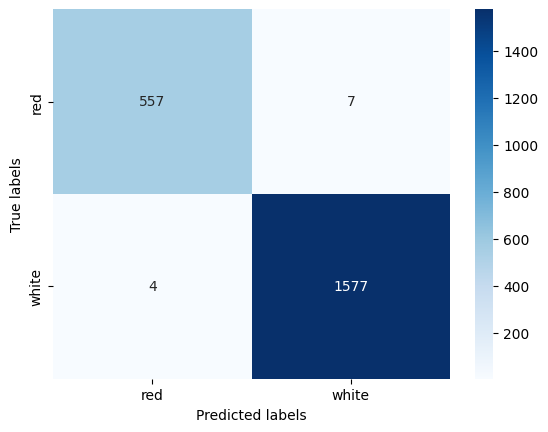

In [85]:
import seaborn as sns

# plot confusion_matrix
sns.heatmap(cm, annot=True, fmt='.0f',  # valores
            cmap=plt.cm.Blues,  # cores
            xticklabels=['red', 'white'], yticklabels=['red', 'white'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [86]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       564
       white       1.00      1.00      1.00      1581

    accuracy                           0.99      2145
   macro avg       0.99      0.99      0.99      2145
weighted avg       0.99      0.99      0.99      2145



# **TESTES - PARTE 4 e PARTE 5 (Anomalias e Overfitting)**



In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.optimize as opt

In [ ]:
import scipy.io as spio
arquivo = '../dados/dadosanomalias.mat'
data = spio.loadmat(arquivo)

In [ ]:
X = np.array(data['X'])

X_val = np.array(data['Xval'])
y_val = data['yval'].flatten()

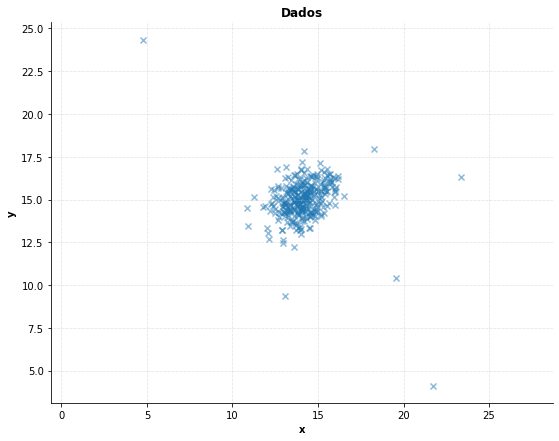

In [ ]:
plt.figure(figsize=(9,7))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Dispersão dos dados
plt.scatter(X[:,0], X[:,1], marker='x', alpha=0.5)


#Configurações visuais adicionais
plt.title('Dados',
          fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.xlabel('x', fontweight='bold')
plt.axis('equal')
sns.despine()

**O que são anomalias?**
Conjunto de pontos de dados que são consideravelmente
diferentes do restante dos dados. Será que estes pontos estão interferindo nos resultados?

**O que são ruídos?**
Valores ou objetos que estão contaminando a base de dados.

Dados registrados de forma equivocada.


# **Validação Cruzada**

Dividindo os dados de treinamento e teste em vários subconjuntos, a validação cruzada permite que os modelos sejam avaliados e comparados a partir de diferentes conjuntos de dados de treinamento e testes. Isso diminui os efeitos de variações nos dados ao longo do tempo, o que pode levar a resultados mais confiáveis e precisos.

A validação cruzada k-fold é útil para avaliar o desempenho de um modelo de ML em diferentes conjuntos de dados, pois permite que você treine e avalie o modelo em todos os dados que você tem. Isso fornece uma estimativa mais precisa sobre como o modelo se comportará quando for usado em novos dados. Além disso, a validação cruzada k-fold pode ser usada para encontrar a melhor combinação de parâmetros para um modelo de ML, pois permite que você teste várias diferentes configurações de parâmetros no mesmo conjunto de dados.

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.
from sklearn.linear_model import LinearRegression # Linear Regression class.

In [114]:
df = pd.read_csv("../dados/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [115]:
df.drop('Serial No.', axis = 1, inplace = True)

In [116]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [151]:
model  = LinearRegression()
kfold  = KFold(n_splits=3, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
result = cross_val_score(model, x, y, cv = kfold)

In [152]:
print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.8139429  0.81183929 0.747442  ]
Mean R^2 for Cross-Validation K-Fold: 0.7910747317120267
